In [39]:
import pandas as pd
import numpy as np
import seaborn as sns



In [ ]:
pg = pd.read_csv(r'C:\Users\User\pinguins2.csv', sep= ';', na_values=['NA', 'NaN', 'null'])

In [41]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


**- Vamos definir os seguintes problemas:**
- 1.Quais pinguins não têm anotações? 
- 2.Quais ilhas a maioria dos pinguins está vindo? 
- 3.Quais as espécies que a ONG mais possui? 
- 4.Existe alguma relação entre as medidas do pinguim e a sua espécie? 
- 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?  

# 1. Quais pinguins não têm anotações? 

In [42]:

pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Espece                344 non-null    object 
 1   Ilha                  344 non-null    object 
 2   largura do bico       342 non-null    float64
 3   profundidade do bico  342 non-null    float64
 4   tamanho_da_asa        342 non-null    float64
 5   massa corporal        342 non-null    float64
 6   sexo                  333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: ylabel='Count'>

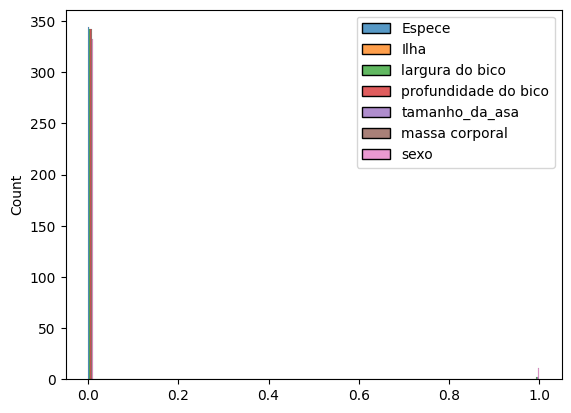

In [43]:
valores_faltantes = pg.isnull()
sns.histplot(valores_faltantes, multiple='dodge')

In [44]:
linhas_com_faltantes = pg[pg.isnull().any(axis=1)]
print(linhas_com_faltantes)

     Espece       Ilha  largura do bico  profundidade do bico  tamanho_da_asa  \
3    Adelie  Torgersen              NaN                   NaN             NaN   
8    Adelie  Torgersen             34.1                  18.1           193.0   
9    Adelie  Torgersen             42.0                  20.2           190.0   
10   Adelie  Torgersen             37.8                  17.1           186.0   
11   Adelie  Torgersen             37.8                  17.3           180.0   
47   Adelie      Dream             37.5                  18.9           179.0   
178  Gentoo     Biscoe             44.5                  14.3           216.0   
218  Gentoo     Biscoe             46.2                  14.4           214.0   
256  Gentoo     Biscoe             47.3                  13.8           216.0   
268  Gentoo     Biscoe             44.5                  15.7           217.0   
271  Gentoo     Biscoe              NaN                   NaN             NaN   

     massa corporal sexo  


Nosso conjunto de dados possui 344 entradas. No entanto, observamos que algumas colunas apresentam valores faltantes:

* **largura do bico**: 2 valores faltantes
* **profundidade do bico**: 2 valores faltantes
* **tamanho da asa**: 2 valores faltantes
* **massa corporal**: 2 valores faltantes
* **sexo**: 11 valores faltantes

Podemos visualizar melhor esses dados ao plotar um gráfico da contagem de valores faltantes. Portanto, os pinguins correspondentes a essas linhas são os que "não têm todas as anotações".
Dessa forma podemos acessar essas linhas específicas e vemos que existem **11 pinguins distintos** sem anotações

# 2. Quais ilhas a maioria dos pinguins está vindo? 

In [45]:
pg.Ilha.value_counts()

Ilha
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: xlabel='Ilha', ylabel='count'>

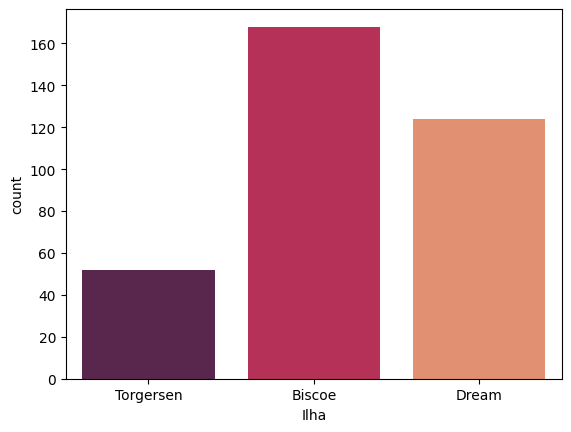

In [46]:
sns.countplot(x='Ilha',hue='Ilha', data=pg, palette='rocket', legend=False)

Primeiro, podemos analisar a contagem de onde cada pinguim vem com `.value_counts()` aplicado sobre a classe ***'Ilha'*** e para efeitos de visualização foi plotado o gráfico da contagem das ilhas onde vemos que a subclasse(ilha) **Torgersen** é a que menos possui representantes, já a subclasse **Biscoe** é a ilha com mais representantes no banco de dados

# 3.Quais as espécies que a ONG mais possui? 

In [47]:
pg.Espece.value_counts()

Espece
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='Espece', ylabel='count'>

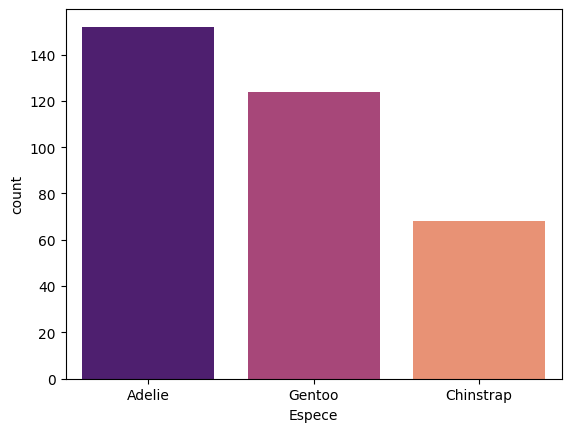

In [48]:
sns.countplot(x='Espece', hue='Espece', data=pg, palette='magma', legend=False)

Novamente podemos realizar o mesmo procedimento anterior. analisar a contagem de cada espécie com `.value_counts()` e para visualização destes dados foi plotado o gráfico da contagem das espécies onde vemos que a subclasse **Chinstrap** é a que menos possui representantes, já a subclasse **Adelie** é a espécie com mais representantes

# 4.Existe alguma relação entre as medidas do pinguim e a sua espécie?

In [49]:
pg.columns

Index(['Espece', 'Ilha', 'largura do bico', 'profundidade do bico',
       'tamanho_da_asa', 'massa corporal', 'sexo'],
      dtype='object')

In [50]:
measures = ['largura do bico', 'profundidade do bico', 'tamanho_da_asa', 'massa corporal']

In [51]:
pg[measures].corr()

,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal
largura do bico,1.000000,-0.235053,0.656181,0.595110
profundidade do bico,-0.235053,1.000000,-0.583851,-0.471916
tamanho_da_asa,0.656181,-0.583851,1.000000,0.871202
massa corporal,0.595110,-0.471916,0.871202,1.000000


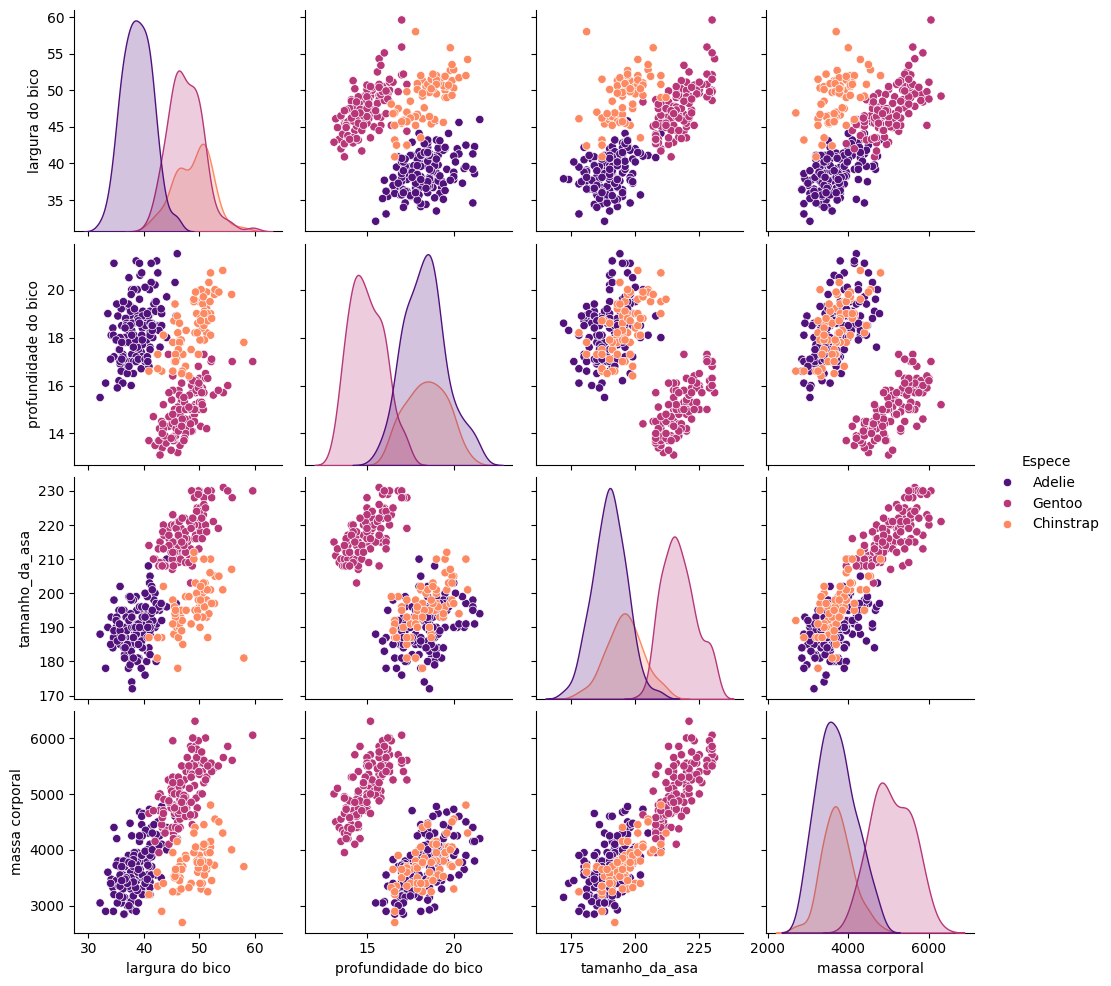

In [52]:
sns.pairplot(pg, hue='Espece', palette='magma')

A análise visual dos dados reforça que as medidas do corpo são indicadores robustos para distinguir as espécies de pinguins.
* **Distribuições das Espécies**:
    Os pinguins Gentoo se destacam claramente, apresentando massa e tamanho das asas significativamente maiores.
    Já as espécies Adelie e Chinstrap têm distribuições muito parecidas, indicando grande semelhança física entre elas.

* **Dispersão dos Dados (Agrupamentos e Correlações)**:
    Os Gentoo formam um grupo bem separado na maioria das comparações, principalmente quando analisamos massa versus tamanho da asa.
    Adelie e Chinstrap, por outro lado, aparecem bastante sobrepostos, mostrando que algumas variáveis (como massa e asa) não são suficientes para diferenciá-los completamente.
    As correlações esperadas, como a relação positiva entre massa e tamanho da asa, foram confirmadas visualmente.
    Em resumo, enquanto os Gentoo são facilmente identificáveis pelas suas medidas maiores, Adelie e Chinstrap exigem critérios mais refinados para uma distinção precisa.

# 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?

In [53]:
pg['sexo'].isna().value_counts()

sexo
False    333
True      11
Name: count, dtype: int64

In [54]:
pg.dropna(subset=['sexo'], inplace= True)

In [55]:
pg['sexo'].isna().value_counts()

sexo
False    333
Name: count, dtype: int64

In [56]:
pd.get_dummies(pg.sexo)

,female,male
0,False,True
1,True,False
2,True,False
4,True,False
5,False,True
...,...,...
339,False,True
340,True,False
341,False,True
342,False,True


In [57]:
sexo = pd.get_dummies(pg.sexo)

In [58]:
pg[['female', 'male']] = sexo

In [59]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,False,True


In [60]:
pg.drop(['sexo'], axis=1, inplace=True)

In [61]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,False,True


In [62]:
pg.drop(['female'], axis= 1, inplace= True)

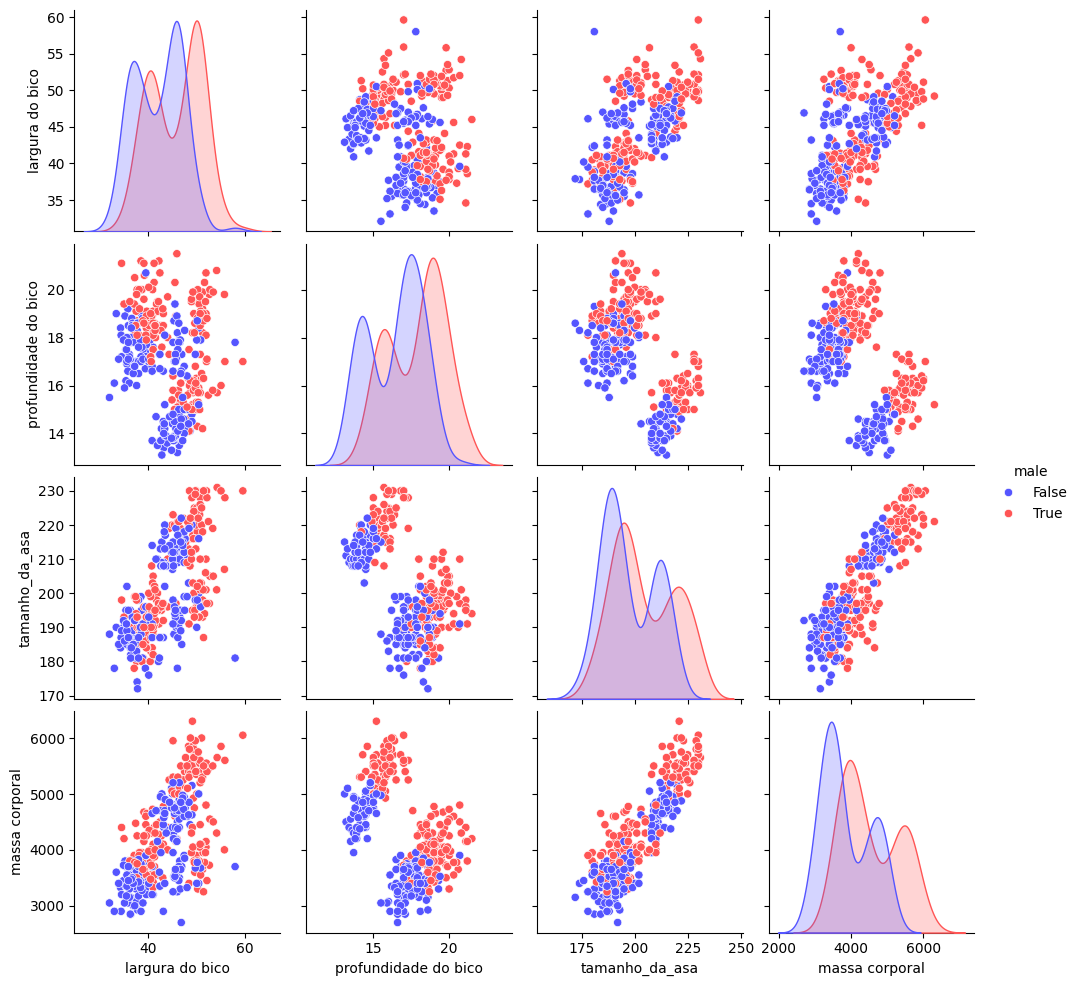

In [71]:
sns.pairplot(pg, hue='male', palette='seismic')

In [64]:
pg['sexo_especie'] = pg.apply(lambda row: f"{'Macho' if row['male'] else 'Fêmea'} {row['Espece']}", axis=1)

In [65]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,male,sexo_especie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,True,Macho Adelie
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,False,Fêmea Adelie
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,False,Fêmea Adelie
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,False,Fêmea Adelie
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,True,Macho Adelie


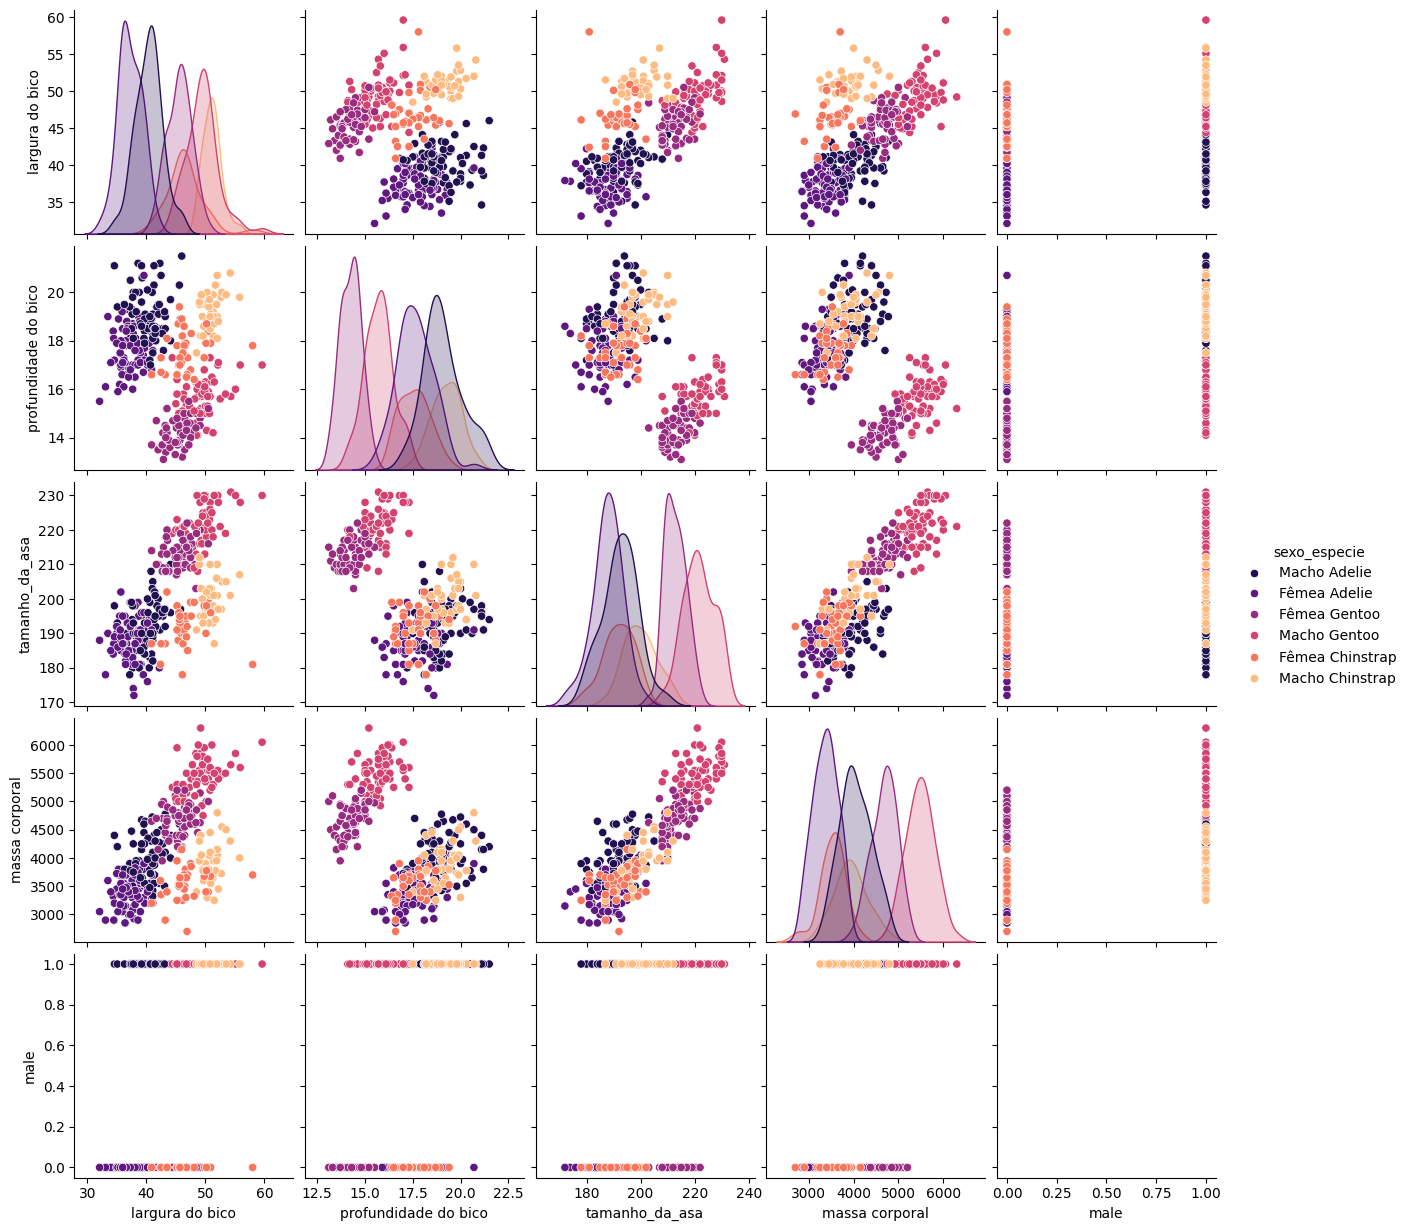

In [76]:
sns.pairplot(pg, hue='sexo_especie', palette='magma')

A análise investigativa começou com a preparação dos dados, convertendo a variável categórica sexo para um formato numérico através do processo de One-Hot Encoding. Uma análise visual inicial, que cruzava as medidas com o sexo, sugeriu a existência de um claro dimorfismo sexual: os pinguins machos, de forma agregada, são geralmente maiores e mais robustos que as fêmeas.
Contudo, essa primeira visualização apresentava uma limitação importante: ao agrupar todas as espécies, não era possível confirmar se esse dimorfismo era uma característica de todas as espécies ou se era influenciado predominantemente por uma delas.

Após a análise inicial sugerir o dimorfismo sexual, foi criada a coluna de interação `sexo_especie` para validar o efeito dentro de cada espécie.

* **Validação do Dimorfismo Sexual:**
    * O padrão de machos serem fisicamente maiores que as fêmeas se repete de forma clara dentro dos clusters de Gentoo (laranjas), Adelie (roxos/rosas) e Chinstrap.
    * A `massa corporal` se destaca como o diferenciador mais evidente entre os sexos em todas as espécies.

* **Diferenciação Entre Espécies:**
    * A espécie Gentoo permanece como um grupo totalmente separado, confirmando ser a maior das três.
    * Adelie e Chinstrap mantêm uma sobreposição significativa, mesmo quando segmentados por sexo.

* **Conclusão:** A visualização comprova que tanto a espécie quanto o sexo são preditores fortes das medidas físicas dos pinguins.

# Modelo para determinar a espécie utilizando as medidas dos pinguins (Usando SVM)

In [494]:
from sklearn.model_selection import train_test_split

In [495]:
X_columns = ['largura do bico', 'profundidade do bico', 'tamanho_da_asa', 'massa corporal']
y_columns = ['Espece']
X = pg[X_columns]
y = pg[y_columns] 

In [496]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [497]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(x_test)
X_total_scaled = scaler.fit_transform(X)

In [498]:
svm_rbf = SVC(kernel='rbf', gamma=0.1, random_state=56)

In [499]:
y_train = y_train.values.ravel()  
svm_rbf.fit(X_train_scaled, y_train)

SVC(gamma=0.1, random_state=56)

In [500]:
preds = svm_rbf.predict(x_test_scaled)

In [501]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(accuracy_score(y_test, preds))
print("Matriz de confusão:")
print(confusion_matrix(y_test, preds))
print("Relatório de classificação:")
print(classification_report(y_test, preds))

y1 = y.values.ravel()  

scores = cross_val_score(svm_rbf, X_total_scaled, y1, cv=5, scoring='accuracy')
print("Acurácias (CV):", scores)
print("Média da acurácia:", scores.mean())


0.99
Matriz de confusão:
[[40  0  0]
 [ 1 18  0]
 [ 0  0 41]]
Relatório de classificação:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Acurácias (CV): [1.         0.98507463 0.95522388 0.98484848 0.98484848]
Média da acurácia: 0.9819990954319312
